In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv("MergedFips.csv")

In [ ]:
print("Correlation between Median Listing Price and Zillow Index:", data['median_listing_price'].corr(data['ZillowValue']))

print("Correlation between Average Listing Price and Zillow Index:", data['average_listing_price'].corr(data['ZillowValue'])) 

print("Correlation between Median Listing Price per Square Foot and Zillow Index:", data['median_listing_price_per_square_foot'].corr(data['ZillowValue'])) 

print("Correlation between Median Square Feet and Zillow Index:", data['median_square_feet'].corr(data['ZillowValue'])) 

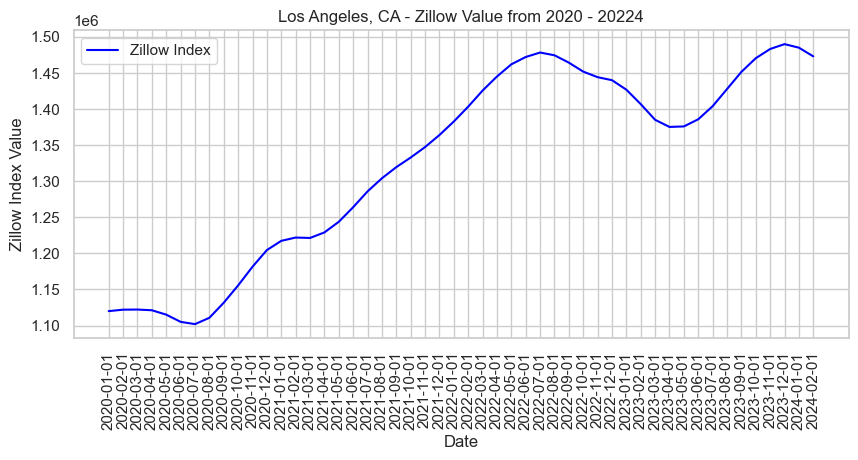

In [ ]:
LA = data.loc[data['county_name'] == "los angeles, ca"]
Marion = data.loc[data['county_name'] == "marion, or"]

sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
plt.figure(figsize=(10, 4))  # Setting the figure size
sns.lineplot(data=LA, x='Date', y='ZillowValue', label='Zillow Index', color='blue')
# sns.lineplot(data=Marion, x='month_date_yyyymm', y='ZillowValue', label='Zillow Index', color='green')
plt.xlabel('Date')
plt.ylabel('Zillow Index Value')
plt.title('Los Angeles, CA - Zillow Value from 2020 - 20224')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.show()




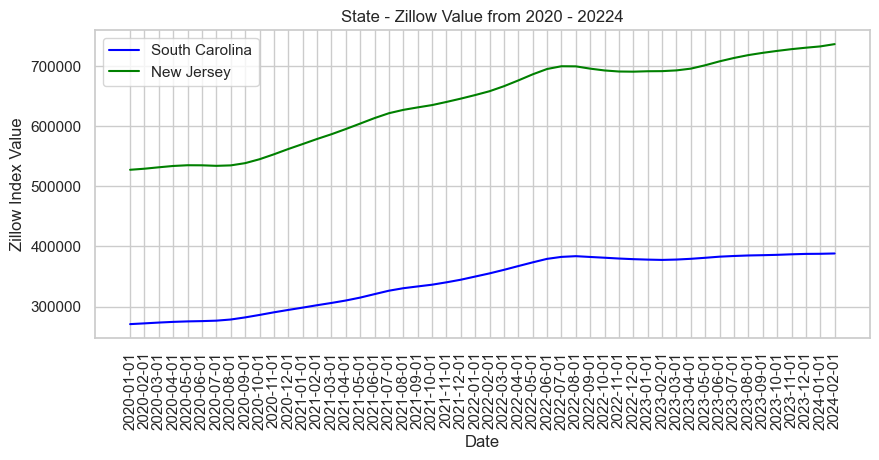

In [7]:
NJ = data.loc[data['State'] == "NJ" ]
NJG = NJ.groupby("Date")["ZillowValue"].mean()
NJG = pd.DataFrame({'Date':NJG.index, 'ZillowValue':NJG.values})

SC = data.loc[data['State'] == "SC"]
SCG = SC.groupby("Date")["ZillowValue"].mean()
SCG = pd.DataFrame({'Date':SCG.index, 'ZillowValue':SCG.values})

sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
plt.figure(figsize=(10, 4))  # Setting the figure size
sns.lineplot(data=SCG, x='Date', y='ZillowValue', label='South Carolina', color='blue')
sns.lineplot(data=NJG, x='Date', y='ZillowValue', label='New Jersey', color='green')
plt.xlabel('Date')
plt.ylabel('Zillow Index Value')
plt.title('State - Zillow Value from 2020 - 20224')
plt.xticks(rotation=90)
plt.show()

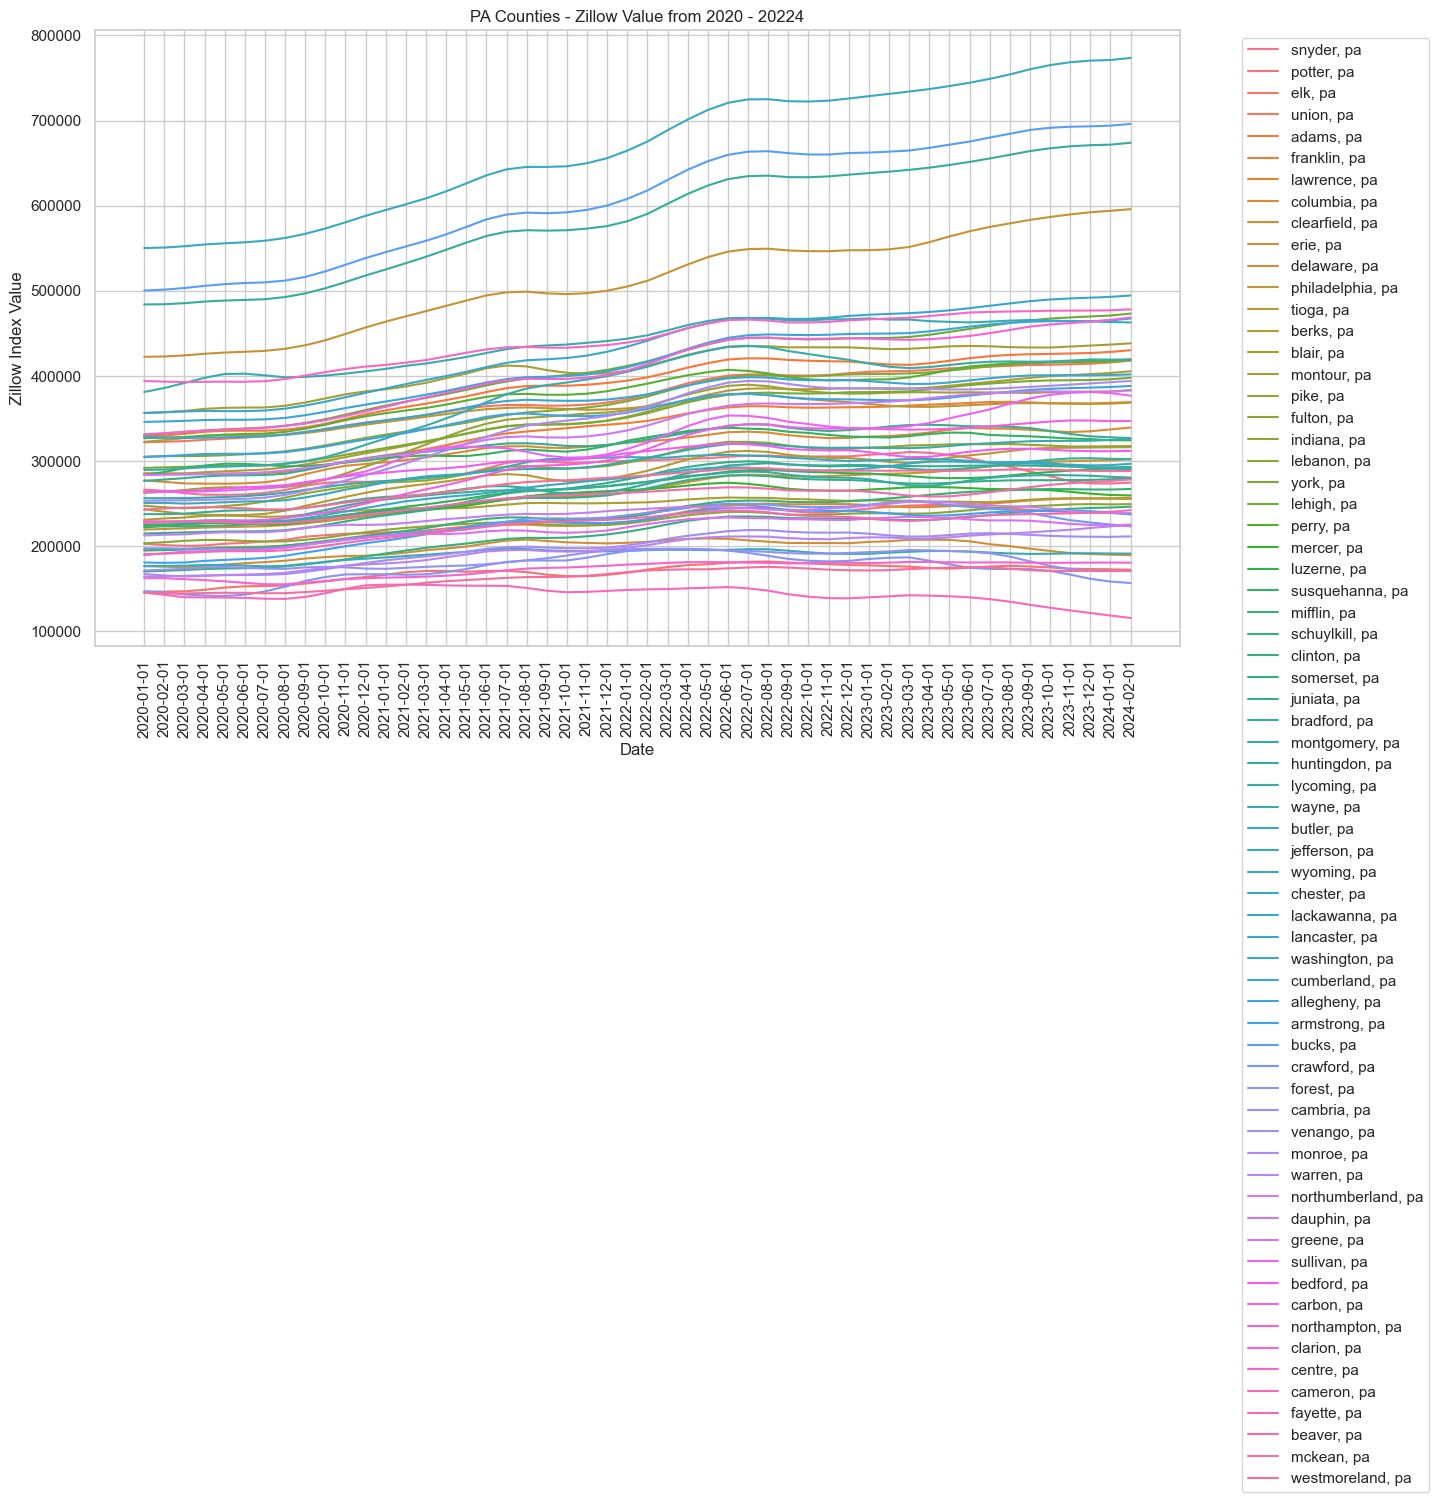

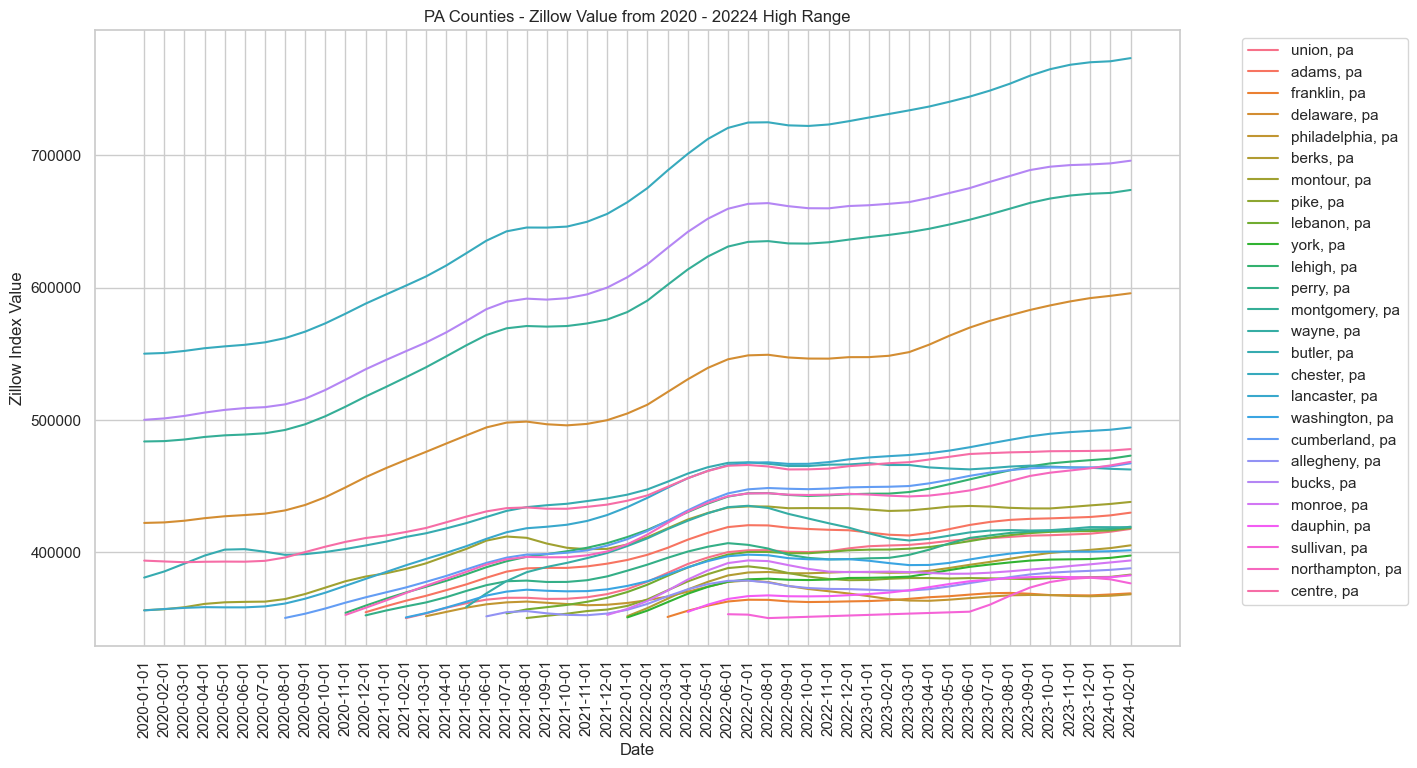

In [4]:
PA = data.loc[data['State'] == "PA"]
# PAG = PA.groupby("county_name")

PA_high = PA.loc[PA['ZillowValue'] >= 350000]

sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
plt.figure(figsize=(14, 8))  # Setting the figure size

sns.lineplot(data=PA, x="Date", y="ZillowValue", hue="county_name")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Date')
plt.ylabel('Zillow Index Value')
plt.title('PA Counties - Zillow Value from 2020 - 20224')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.show()


sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
plt.figure(figsize=(14, 8))  # Setting the figure size
sns.lineplot(data=PA_high, x="Date", y="ZillowValue", hue="county_name")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Date')
plt.ylabel('Zillow Index Value')
plt.title('PA Counties - Zillow Value from 2020 - 20224 High Range')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.show()
